# Adult Dataset được cung cấp bởi UCI (University of California, Irvine) 
# được sử dụng để phát triển mô hình dự đoán Predictive Model Development.

# Bộ dữ liệu adult.data và adult.test chứa 48.842 mẫu và có 14 attributes/features. 
# Dữ liệu này được dùng để xây dựng model dự đoán và kiểm tra một mẫu có thu nhập >50K USD hay không.

## Attribute Information:
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Marriedspouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Privhouse-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, OutlyingUS(Guam-USVI-etc), India, Japan, Greece, South, China,  Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* Class: >50K, <=50 K.

## <span style='color:red'>Yêu cầu:
### Đọc dữ liệu adult.data, tiền xử lý dữ liệu.
### Xem xét tính cân bằng giữa hai loại mẫu. Trực quan hóa. Nhận xét.
### Nếu 2 loại mẫu này không cân bằng, hãy chọn một phương pháp cân bằng dữ liệu và thực hiện. Trực quan hóa kết quả

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
            'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']
adult = pd.read_csv('data7/Ex2_Adult_Dataset/adult.data', header=None, names=col_names)
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
#Replace '?' value with np.nan then drop nan
adult = pd.read_csv('data7/Ex2_Adult_Dataset/adult.data', header=None, names=col_names)
for col in col_names:
    if adult[col].dtypes == 'object':
        adult[col] = adult[col].str.strip().replace('?', np.nan)
    else: continue

adult = adult.dropna()
adult.shape

(30162, 15)

## Ouput: adult['class']: >50k or <=50k
## Input: remaining columns

In [4]:
categorical_cols = adult.select_dtypes(include='object').columns

adult_encode = pd.get_dummies(adult, columns=categorical_cols, drop_first=True).astype(int) #encode
x =  adult_encode.drop('class_>50K', axis=1)
y = adult_encode['class_>50K']

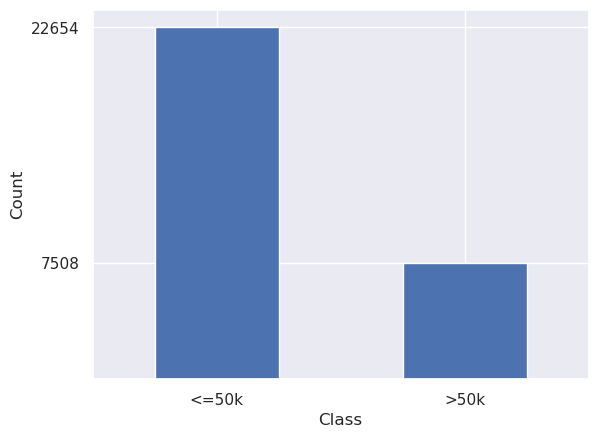

In [5]:
sbn.set_theme(style='darkgrid')

y.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.yticks(y.value_counts())
plt.xticks(ticks =[0,1], labels=['<=50k', '>50k'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

## There are 22654 observations with <=50k USD
## While only 7508 observations with >50k USD
## <span style='color:green'> Use UnderSampling to reduce the sample size of class "<=50k
## (since the >50k sample size is large enough (7841), don't use OverSampling)

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [23]:
under_samp = RandomUnderSampler(random_state=0)
x_undsamp, y_undsamp = under_samp.fit_resample(x, y)

adult_undsamp = pd.DataFrame(x_undsamp, columns=x.columns)
adult_undsamp['class_>50K'] = y_undsamp

In [48]:
y.unique()

array([0, 1])

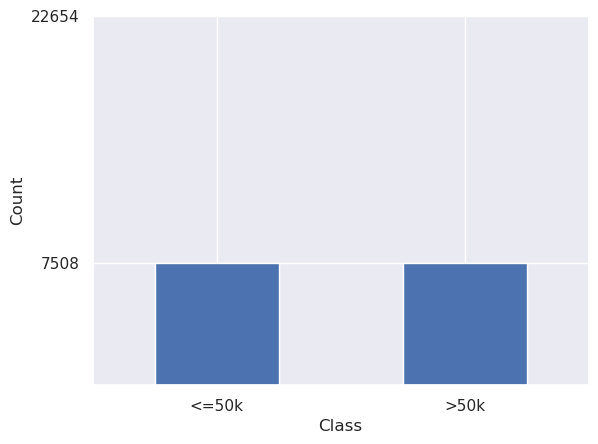

In [64]:
y_undsamp.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.yticks(y.value_counts())
plt.xticks(ticks =[0,1], labels=['<=50k', '>50k'])
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

## <span style='color:red'> Build Logistic Regression model to evaluate UnderSampling effectiveness

### <span style='color:yellow'> train with original IMBALANCED data 

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

In [155]:
log_imbalanced = LogisticRegression()
log_imbalanced.fit(x,y)

/home/long/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
y_pred_imba = log_imbalanced.predict(x)
y_prob_imba = log_imbalanced.predict_proba(x)

print(f"Accuracy score of LogReg trained with imbalanced data = {accuracy_score(y, y_pred_imba)}")
print()
print(f"Confusion matrix of LogReg trained with imbalanced data:\n {confusion_matrix(y, y_pred_imba)}")
print()
print(f"Classification report of LogReg trained with imbalanced data:\n {classification_report(y, y_pred_imba, target_names=['<=50K', '>50K'])}")

Accuracy score of LogReg trained with imbalanced data = 0.7903653603872423

Confusion matrix of LogReg trained with imbalanced data:
 [[21845   809]
 [ 5514  1994]]

Classification report of LogReg trained with imbalanced data:
               precision    recall  f1-score   support

       <=50K       0.80      0.96      0.87     22654
        >50K       0.71      0.27      0.39      7508

    accuracy                           0.79     30162
   macro avg       0.75      0.61      0.63     30162
weighted avg       0.78      0.79      0.75     30162



### The recall and f1-score of class ">50K" is very low

ROC_AUC score of LogReg trained with imbalanced data = 0.5934745176787737



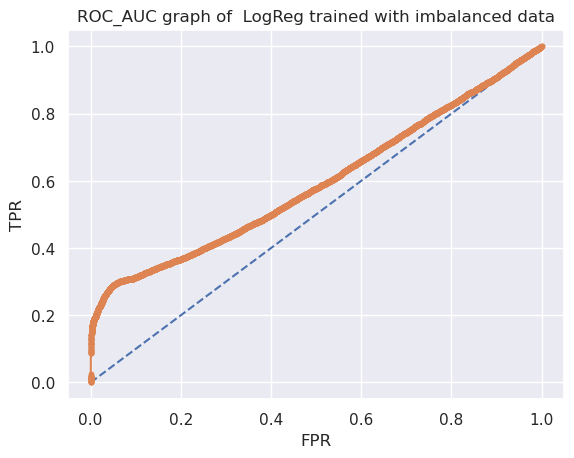

In [157]:
print(f"ROC_AUC score of LogReg trained with imbalanced data = {roc_auc_score(y, y_prob_imba[:,1])}")
print()

fpr_imba, tpr_imba, threshold_imba = roc_curve(y, y_prob_imba[:,1])
plt.plot([0,1], [0,1], linestyle='--', label = 'Reference line')
plt.plot(fpr_imba, tpr_imba, marker='.', label = 'ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_AUC graph of  LogReg trained with imbalanced data')
plt.show()

## ROC_AUC score is very low, the ROC_AUC curve is very closed to the reference line => Can't use this model

## <span style='color:yellow'> train with UnderSampling data 

In [158]:
log_undsamp = LogisticRegression().fit(x_undsamp, y_undsamp)

/home/long/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
y_pred_undsamp = log_undsamp.predict(x_undsamp)
y_prob_undsamp = log_undsamp.predict_proba(x_undsamp)

print(f"Accuracy score of LogReg trained with UnderSample data = {accuracy_score(y_undsamp, y_pred_undsamp)}")
print()
print(f"Confusion matrix of LogReg trained with UnderSample data:\n {confusion_matrix(y_undsamp, y_pred_undsamp)}")
print()
print(f"Classification report of LogReg trained with UnderSample data:\n {classification_report(y_undsamp, y_pred_undsamp, target_names=['<=50K', '>50K'])}")

Accuracy score of LogReg trained with UnderSample data = 0.629661694192861

Confusion matrix of LogReg trained with UnderSample data:
 [[5244 2264]
 [3297 4211]]

Classification report of LogReg trained with UnderSample data:
               precision    recall  f1-score   support

       <=50K       0.61      0.70      0.65      7508
        >50K       0.65      0.56      0.60      7508

    accuracy                           0.63     15016
   macro avg       0.63      0.63      0.63     15016
weighted avg       0.63      0.63      0.63     15016



## After undersampling, the recall and f1-score of ">50K" has improved, but also drecrease the ones of "<=50K"

ROC_AUC score of LogReg trained with UnderSample data = 0.6897787449735733



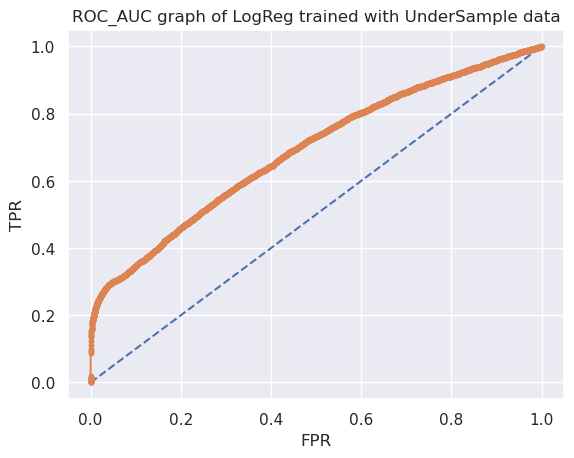

In [161]:
print(f"ROC_AUC score of LogReg trained with UnderSample data = {roc_auc_score(y_undsamp, y_prob_undsamp[:,1])}")
print()

fpr_undsamp, tpr_undsamp, threshold_undsamp = roc_curve(y_undsamp, y_prob_undsamp[:,1])
plt.plot([0,1], [0,1], linestyle='--', label = 'Reference line')
plt.plot(fpr_undsamp, tpr_undsamp, marker='.', label = 'ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_AUC graph of LogReg trained with UnderSample data')
plt.show()

## After undersampling, ROC_AUC score improves about 10%, ROC_AUC curve also improves slightly

## <span style='color:red'> Build DecisionTree model to train with imbalanced data

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
tree_model = DecisionTreeClassifier().fit(x,y)

In [164]:
y_pred_tree = tree_model.predict(x)
y_prob_tree = tree_model.predict_proba(x)

print(f"Accuracy score of DecisionTree trained with imbalanced data = {accuracy_score(y, y_pred_tree)}")
print()
print(f"Confusion matrix of DecisionTree trained with imbalanced data:\n {confusion_matrix(y, y_pred_tree)}")
print()
print(f"Classification report of DecisionTree trained with imbalanced data:\n {classification_report(y, y_pred_tree, target_names=['<=50K', '>50K'])}")

Accuracy score of DecisionTree trained with imbalanced data = 0.9999668456998873

Confusion matrix of DecisionTree trained with imbalanced data:
 [[22654     0]
 [    1  7507]]

Classification report of DecisionTree trained with imbalanced data:
               precision    recall  f1-score   support

       <=50K       1.00      1.00      1.00     22654
        >50K       1.00      1.00      1.00      7508

    accuracy                           1.00     30162
   macro avg       1.00      1.00      1.00     30162
weighted avg       1.00      1.00      1.00     30162



ROC_AUC score of DecisionTree trained with imbalanced data = 0.9999999970603147



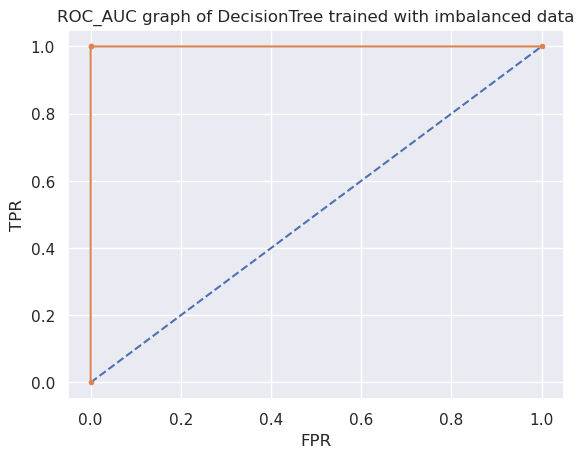

In [165]:
print(f"ROC_AUC score of DecisionTree trained with imbalanced data = {roc_auc_score(y, y_prob_tree[:,1])}")
print()

fpr_tree, tpr_tree, threshold_tree = roc_curve(y, y_prob_tree[:,1])
plt.plot([0,1], [0,1], linestyle='--', label = 'Reference line')
plt.plot(fpr_tree, tpr_tree, marker='.', label = 'ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_AUC graph of DecisionTree trained with imbalanced data')
plt.show()

## All validation scores of DecisionTree are perfect! Since DecisionTree model can work well with imbalanced data